# Reducción de dimensión con SOM



El proceso de reducción de dimensión puede hacerse con PCA/SVD pero también puede hacerse con los mapeos autorganizados. Esta es una red neuronal basada en el proceso que el cerebro hace al mapear información multidimensional del entorno a una representación a través de conexiones sinápticas dentro del cerebro.

El siguiente tutorial es un ejemplo del som mapeando el dataset de dígitos 

In [9]:
import numpy as np
%matplotlib inline

from sklearn.datasets import load_digits
from minisom import MiniSom

from matplotlib import pyplot as plt
from sklearn.preprocessing import scale

## Preprocesamiento 

In [7]:
digits_dataset = load_digits()
data = digits_dataset['data']
labels = digits_dataset['target']

¿Cómo es el dataset?
Vamos a graficar algunos de los números 

Text(0.5, 1.0, '2')

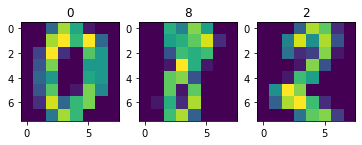

In [27]:
fig, axs = plt.subplots(1,3, figsize=(6,2))
i = 0
axs[0].imshow(data[i].reshape(8,8))
axs[0].set_title(labels[i])
i = 18
axs[1].imshow(data[i].reshape(8,8))
axs[1].set_title(labels[i])
i = 50
axs[2].imshow(data[i].reshape(8,8))
axs[2].set_title(labels[i])

El vector 0 se ve de la siguiente forma como vector

In [26]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Siempre es mucho mejor escalar nuestras entradas entre el 0 y el 1

In [29]:
data = scale(data)
data[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

## Definición e inicialización

Vamos a instanciar nuestro SOM a una rejilla de 30x30 con una constante $\sigma = 4$ que sirve para determinar la reducción de la vecindad de influencia de la BMU, la constante de aprendizaje la ajustamos a $0.5$ y la forma de la vecindad va a ser un triángulo (puede ser un cuadrado o un hexágono).

In [30]:
som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, 
              neighborhood_function='triangle')


Ahora vamos a inicializar nuestro mapa con una primera aproximación al mapeo de nuestros datos usando un PCA 

In [31]:
som.pca_weights_init(data)


## Entrenamiento

Entrenamos nuestro mapa unas 5000 epócas


In [32]:
som.train(data, 5000, random_order=True, verbose=True)  

 [  379 / 5000 ]   8% - 0:00:02 left 

 [  826 / 5000 ]  17% - 0:00:02 left 

 [ 1101 / 5000 ]  22% - 0:00:02 left 

 [ 1406 / 5000 ]  28% - 0:00:02 left 

 [ 1730 / 5000 ]  35% - 0:00:01 left 

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.0199328078627277


## Visualización

Los pesos quedaron entonces plasmados dentro del mapa y podemos analizarlo

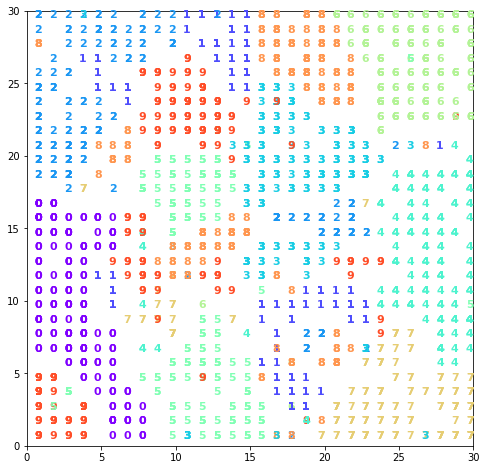

In [34]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, labels):  # vector y etiqueta de vector
    w = som.winner(x)           # w es el peso en la neurona i,j ganador para el vector x
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('./som_digtos.png')
plt.show()

Lo que este mapa está diciendo es que cada estímulo (etiquetado con cada número) quedó mapeado por la neurona $(i,j)$ sobre la que cayó. En este proceso se puede ver que todos los número "similares" o de la misma clase quedaron mapeado cercanos dentro del mapa definiendo grupos en él. Y en algunos casos se puede ver que hay algunos "errores" entendibles debido a la forma de cada número (ejemplo: 3 y 9, o 9 y 0).

Aunque el SOM es una herramienta para reducir dimensión, es usualmente ocupado para detección de grupos como es el caso de éste ejemplo.

Para más información del SOM puede ver [Scholarpedia - Kohonen maps](http://www.scholarpedia.org/article/Kohonen_network)